/home/gyuha_lee/miniconda3/envs/routing_algorithm/lib/python3.9/site-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


Graph with 7389 nodes and 21656 edges.


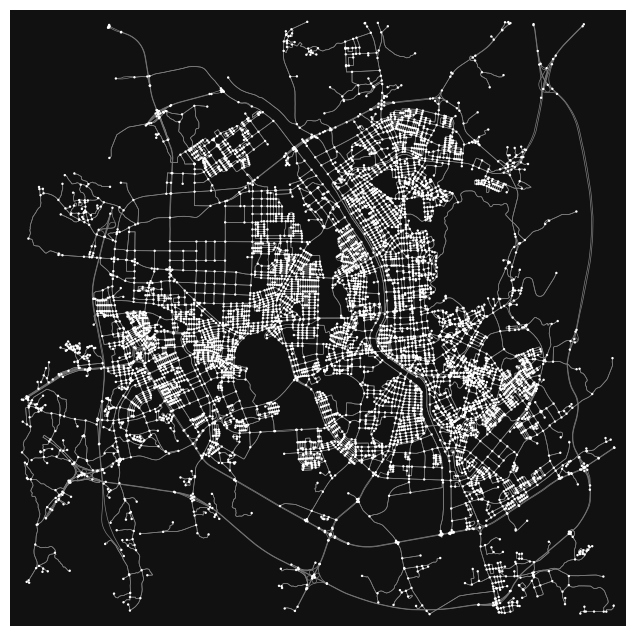

노드의 수: 7389
엣지의 수: 21656


In [63]:
import osmnx as ox

# 청주 중심 좌표와 반경으로 도로망 가져오기
def get_osm_network_from_point(center_point=(36.63547, 127.46891), dist=6000): # 시계탑오거리를 기준으로 반경 6KM 지역 대상
    G = ox.graph_from_point(center_point, dist=dist, network_type="drive")
    print(f"Graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    return G


network = get_osm_network_from_point()
ox.plot_graph(network,
              node_size=3,
              edge_linewidth=0.5,
              edge_color="gray"  # 엣지 색상을 회색으로 설정
              )
print(f"노드의 수: {network.number_of_nodes()}")
print(f"엣지의 수: {network.number_of_edges()}")


In [46]:
# 노드, 엣지 데이터 추출
nodes, edges = ox.graph_to_gdfs(network)

In [61]:
# 노드 데이터를 확인하시려면 주석을 제거하세요
nodes.head(8000)

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
282124597,36.592201,127.424921,3,NaN,NaN,POINT (127.42492 36.59220)
282683938,36.602044,127.477776,3,NaN,NaN,POINT (127.47778 36.60204)
282683949,36.607143,127.481705,4,NaN,NaN,POINT (127.48171 36.60714)
282683973,36.624401,127.488601,3,NaN,NaN,POINT (127.48860 36.62440)
282683982,36.628661,127.491301,3,NaN,NaN,POINT (127.49130 36.62866)
...,...,...,...,...,...,...
12143911316,36.619218,127.403374,3,NaN,NaN,POINT (127.40337 36.61922)
12143911319,36.616135,127.402966,3,NaN,NaN,POINT (127.40297 36.61613)
12324407110,36.638109,127.440828,3,NaN,NaN,POINT (127.44083 36.63811)


In [62]:
# 엣지 데이터를 확인하시려면 주석을 제거하세요
edges.head(22000)

osmid  oneway lanes  ref  name  \
u           v           key                                                     
282683938   11539962479 0                  773945436    True     4   96   청남로   
            4851300461  0                  493197063    True   NaN  NaN   NaN   
282683949   8357137325  0                  792830647   False     4   96   청남로   
            8357137323  0                  899449095   False     4   96   청남로   
            8357137326  0                  899449097   False   NaN  NaN  1순환로   
...                                              ...     ...   ...  ...   ...   
12324407120 2968511948  0                  556736299   False   NaN  NaN   공단로   
            2968511949  0                  556736299   False   NaN  NaN   공단로   
12324530302 1621250951  0                  453465512   False   NaN  NaN   원봉로   
            1645266226  0                  453465512   False   NaN  NaN   원봉로   
            4500092890  0    [1332064052, 453250814]   False   NaN  NaN   NaN   

                                    highway reversed   length  \
u           v           key                                     
282683938   11539962479 0         secondary    False   35.243   
            4851300461  0    secondary_link    False   37.214   
282683949   8357137325  0         secondary    False   41.896   
            8357137323  0         secondary     True   46.273   
            8357137326  0         secondary     True   38.163   
...                                     ...      ...      ...   
12324407120 2968511948  0          tertiary    False   14.455   
            2968511949  0          tertiary     True   28.172   
12324530302 1621250951  0       residential    False  181.126   
            1645266226  0       residential     True  181.152   
            4500092890  0       residential     True  268.174   

                                                                      geometry  \
u           v           key                                                      
282683938   11539962479 0    LINESTRING (127.47778 36.60204, 127.47804 36.6...   
            4851300461  0    LINESTRING (127.47778 36.60204, 127.47789 36.6...   
282683949   8357137325  0    LINESTRING (127.48171 36.60714, 127.48201 36.6...   
            8357137323  0    LINESTRING (127.48171 36.60714, 127.48139 36.6...   
            8357137326  0    LINESTRING (127.48171 36.60714, 127.48138 36.6...   
...                                                                        ...   
12324407120 2968511948  0    LINESTRING (127.44176 36.63815, 127.44164 36.6...   
            2968511949  0    LINESTRING (127.44176 36.63815, 127.44199 36.6...   
12324530302 1621250951  0    LINESTRING (127.51183 36.61215, 127.51198 36.6...   
            1645266226  0    LINESTRING (127.51183 36.61215, 127.51167 36.6...   
            4500092890  0    LINESTRING (127.51183 36.61215, 127.51107 36.6...   

                            maxspeed bridge width tunnel junction access  
u           v           key                                               
282683938   11539962479 0        NaN    NaN   NaN    NaN      NaN    NaN  
            4851300461  0        NaN    NaN   NaN    NaN      NaN    NaN  
282683949   8357137325  0        NaN    NaN   NaN    NaN      NaN    NaN  
            8357137323  0        NaN    NaN   NaN    NaN      NaN    NaN  
            8357137326  0        NaN    NaN   NaN    NaN      NaN    NaN  
...                              ...    ...   ...    ...      ...    ...  
12324407120 2968511948  0        NaN    NaN   NaN    NaN      NaN    NaN  
            2968511949  0        NaN    NaN   NaN    NaN      NaN    NaN  
12324530302 1621250951  0        NaN    NaN   NaN    NaN      NaN    NaN  
            1645266226  0        NaN    NaN   NaN    NaN      NaN    NaN  
            4500092890  0        NaN    NaN   NaN    NaN      NaN    NaN  

[21656 rows x 15 columns]

In [64]:
# 중복 노드 검증
def check_duplicate_nodes(nodes):
    # 'x', 'y' 좌표 기준 중복 확인
    duplicate_nodes = nodes.duplicated(subset=['x', 'y']).sum()
    if duplicate_nodes > 0:
        print(f"중복 노드를 발견했어요! : {duplicate_nodes}.")
    else:
        print("데이터 내 좌표에 대한 중복 데이터는 존재하지 않아요.")

# 중복 엣지 검증
def check_duplicate_edges(edges):
    # 'geometry'와 'length'를 기준으로 중복 확인
    duplicate_edges = edges.duplicated(subset=['geometry', 'length']).sum()
    if duplicate_edges > 0:
        print(f"'geometry' and 'length' 파라미터에 따라 중복 엣지를 발견했어요! : {duplicate_edges}")
    else:
        print("'geometry' and 'length' 파라미터에 따라 중복 엣지는 존재하지 않아요.")

# 중복 노드 검증 실행
check_duplicate_nodes(nodes)
# 중복 엣지 검증 실행
check_duplicate_edges(edges)

데이터 내 좌표에 대한 중복 데이터는 존재하지 않아요.
'geometry' and 'length' 파라미터에 따라 중복 엣지는 존재하지 않아요.


In [68]:
# 출발지와 도착지 좌표
start_coords = (36.617646, 127.517828)  # 출발지: 동남지구 올리브영 사거리
end_coords = (36.666138, 127.453691)    # 도착지: 강서2동 행정복지센터

# 그래프에서 가장 가까운 노드 찾기
start_node = ox.distance.nearest_nodes(network, start_coords[1], start_coords[0])  # (경도, 위도)
end_node = ox.distance.nearest_nodes(network, end_coords[1], end_coords[0])

print(f"출발지의 노드 ID: {start_node}, 도착지의 노드 ID: {end_node}")

출발지의 노드 ID: 4967136124, 도착지의 노드 ID: 5417688010


In [51]:
import heapq

def dijkstra_algorithm(graph, start_node, end_node):
    # 최단 거리 테이블 초기화
    distances = {node: float('inf') for node in graph.nodes}
    predecessors = {node: None for node in graph.nodes}  # 경로 추적을 위한 이전 노드 저장
    distances[start_node] = 0

    # 우선순위 큐 (힙 구조)
    priority_queue = [(0, start_node)]  # (현재 거리, 노드)

    while priority_queue:
        # 우선순위 큐에서 가장 짧은 거리의 노드 추출
        current_distance, current_node = heapq.heappop(priority_queue)

        # 이미 처리된 노드라면 스킵
        if current_distance > distances[current_node]:
            continue

        # 인접 노드 탐색
        for neighbor, edge_data in graph[current_node].items():
            # 엣지의 길이를 가중치로 사용
            weight = edge_data[0]['length']  # 그래프 데이터에서 'length' 값
            new_distance = current_distance + weight

            # 더 짧은 경로를 발견하면 거리 갱신
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node
                heapq.heappush(priority_queue, (new_distance, neighbor))

    # 최단 경로 추적
    path = []
    current_node = end_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]

    return path[::-1], distances[end_node]  # 최단 경로와 해당 경로의 거리 반환


[다익스트라 알고리즘]
최단 경로에 따른 노드들: [4967136124, 2364167325, 4529972644, 1621250971, 2362564013, 4529972610, 4574646187, 4577214943, 4574646175, 3958441486, 4577214937, 4495961089, 4497753198, 2916825544, 4497753194, 3958426150, 4574646035, 3958665083, 4574646028, 3958426570, 2930970457, 2930934630, 1645268168, 4520042129, 2916825553, 4502480000, 4502480004, 4502480005, 4502480006, 4502480007, 4502480008, 4494248026, 4494248027, 4494248020, 4494248035, 4494248032, 4494248045, 2939425505, 2939425509, 2939425511, 4488599153, 2939425523, 414918124, 4488599136, 2939425550, 1645268876, 2939425546, 4487156745, 4487156758, 1645268873, 4487156760, 1645268903, 4487156763, 4487156765, 4487156764, 2930760269, 2930760274, 2939425606, 2930760282, 4487156729, 2930760300, 2930760294, 2935569284, 2939425651, 3958744282, 3958744285, 2281782909, 2939425654, 2939425660, 2281782910, 321246853, 2279031930, 2279031985, 2270311085, 2279017975, 2279017991, 2279018000, 4708207260, 2279018017, 2270311128, 2277890791, 2

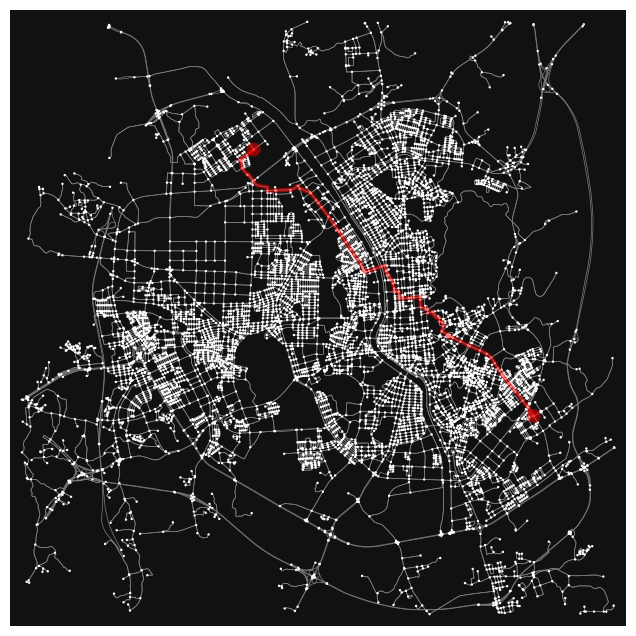

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [66]:
import time

# 그래프에서 가장 가까운 노드 찾기
start_node = ox.distance.nearest_nodes(network, start_coords[1], start_coords[0])  # (경도, 위도)
end_node = ox.distance.nearest_nodes(network, end_coords[1], end_coords[0])

# 다익스트라 실행 시간 측정
start_time = time.time()
# 다익스트라 알고리즘 실행
dijkstra_path, dijkstra_distance = dijkstra_algorithm(network, start_node, end_node)
dijkstra_time = time.time() - start_time

print("[다익스트라 알고리즘]")
print("최단 경로에 따른 노드들:", dijkstra_path)
print("거리 (m):", dijkstra_distance)
print(f"최단 경로 도출에 소요된 시간: {dijkstra_time:.4f} seconds")
ox.plot_graph_route(network, route=dijkstra_path, route_linewidth=3, node_size=3, edge_linewidth=0.5, edge_color="gray") 


In [ ]:
def bellman_ford_algorithm(graph, start_node, end_node):
    # 최단 거리 테이블 초기화
    distances = {node: float('inf') for node in graph.nodes}
    predecessors = {node: None for node in graph.nodes}  # 경로 추적을 위한 이전 노드 저장
    distances[start_node] = 0  # 출발 노드의 최단 거리는 0

    # 노드 개수
    num_nodes = len(graph.nodes)

    # 모든 엣지에 대해 (노드 개수 - 1)번 반복
    for _ in range(num_nodes - 1):
        for u, v, edge_data in graph.edges(data=True):
            weight = edge_data['length']  # 엣지 가중치
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                predecessors[v] = u

    # 최단 경로 추적
    path = []
    current_node = end_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]

    return path[::-1], distances[end_node]  # 최단 경로와 해당 경로의 거리 반환


[벨만-포드 알고리즘]
최단 경로에 따른 노드들: [4967136124, 2364167325, 4529972644, 1621250971, 2362564013, 4529972610, 4574646187, 4577214943, 4574646175, 3958441486, 4577214937, 4495961089, 4497753198, 2916825544, 4497753194, 3958426150, 4574646035, 3958665083, 4574646028, 3958426570, 2930970457, 2930934630, 1645268168, 4520042129, 2916825553, 4502480000, 4502480004, 4502480005, 4502480006, 4502480007, 4502480008, 4494248026, 4494248027, 4494248020, 4494248035, 4494248032, 4494248045, 2939425505, 2939425509, 2939425511, 4488599153, 2939425523, 414918124, 4488599136, 2939425550, 1645268876, 2939425546, 4487156745, 4487156758, 1645268873, 4487156760, 1645268903, 4487156763, 4487156765, 4487156764, 2930760269, 2930760274, 2939425606, 2930760282, 4487156729, 2930760300, 2930760294, 2935569284, 2939425651, 3958744282, 3958744285, 2281782909, 2939425654, 2939425660, 2281782910, 321246853, 2279031930, 2279031985, 2270311085, 2279017975, 2279017991, 2279018000, 4708207260, 2279018017, 2270311128, 2277890791, 2

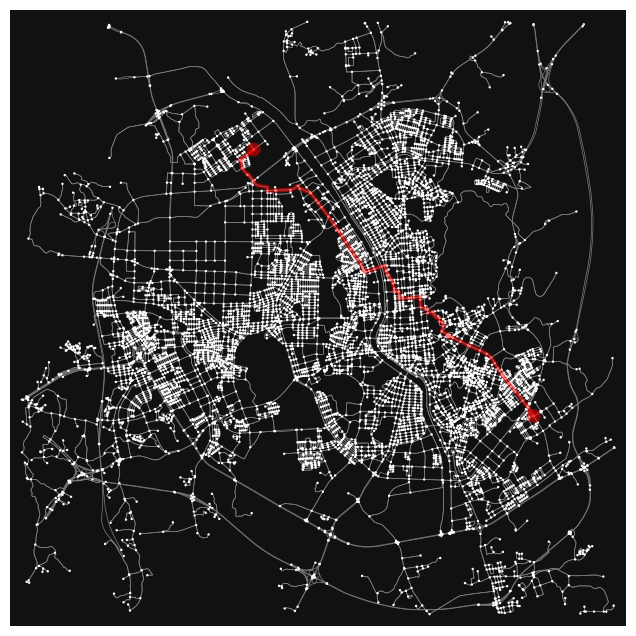

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [67]:
# 그래프에서 가장 가까운 노드 찾기
start_node = ox.distance.nearest_nodes(network, start_coords[1], start_coords[0])  # (경도, 위도)
end_node = ox.distance.nearest_nodes(network, end_coords[1], end_coords[0])

# 벨만-포드 실행 시간 측정
start_time = time.time()
bellman_ford_path, bellman_ford_distance = bellman_ford_algorithm(network, start_node, end_node)
bellman_ford_time = time.time() - start_time

# 결과 출력
print("[벨만-포드 알고리즘]")
print("최단 경로에 따른 노드들:", bellman_ford_path)
print("거리 (m):", bellman_ford_distance)
print(f"최단 경로 도출에 소요된 시간: {bellman_ford_time:.4f} seconds")

# 경로 시각화
ox.plot_graph_route(network, route=bellman_ford_path, route_linewidth=3, node_size=3, edge_linewidth=0.5, edge_color="gray") 

두 알고리즘에 의해 도출된 경로가 같아요!
두 알고리즘에 의해 도출된 경로의 거리가 같아요!


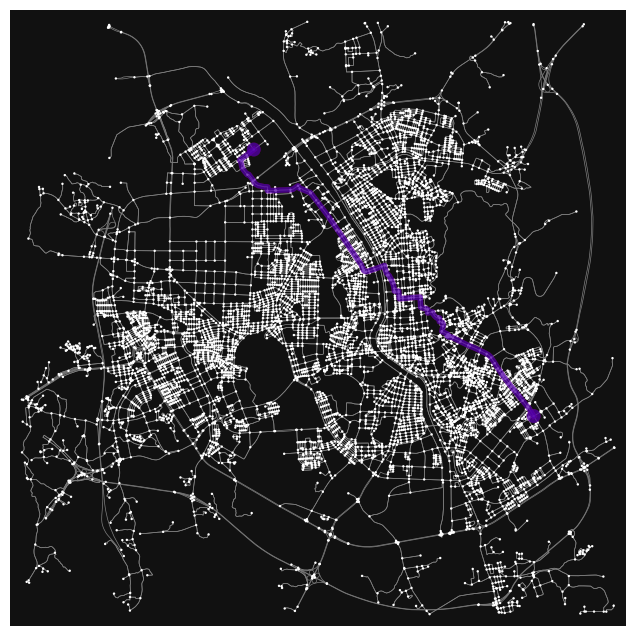

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [70]:
# 경로 비교
if dijkstra_path == bellman_ford_path:
    print("두 알고리즘에 의해 도출된 경로가 같아요!")
else:
    print("두 알고리즘에 의해 도출된 경로가 달라요!")
    print("다익스트라 알고리즘 경로:", dijkstra_path)
    print("벨만-포드 알고리즘 경로:", bellman_ford_path)

# 총 거리 비교
if dijkstra_distance == bellman_ford_distance:
    print("두 알고리즘에 의해 도출된 경로의 거리가 같아요!")
else:
    print("두 알고리즘에 의해 도출된 경로의 거리가 달라요!")
    print(f"다익스트라 알고리즘 거리: {dijkstra_distance} m")
    print(f"벨만-포드 알고리즘 거리: {bellman_ford_distance} m")

# 두 경로를 시각적으로 비교
ox.plot_graph_routes(
    network,
    routes=[dijkstra_path, bellman_ford_path],
    route_colors=['red', 'blue'],  # 다익스트라는 빨간색, 벨만-포드는 파란색
    route_linewidth=3,
    node_size=3,
    edge_linewidth=0.5,
    edge_color="gray"
)



In [71]:
import heapq
import time

# 단순 리스트 기반 다익스트라
def dijkstra_with_list(graph, start_node, end_node):
    distances = {node: float('inf') for node in graph.nodes}
    predecessors = {node: None for node in graph.nodes}
    distances[start_node] = 0

    # 리스트 사용
    unvisited_nodes = list(graph.nodes)
    while unvisited_nodes:
        # 리스트에서 최소 거리 노드 선택
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        if distances[current_node] == float('inf'):
            break

        for neighbor, edge_data in graph[current_node].items():
            weight = edge_data[0]['length']
            new_distance = distances[current_node] + weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node

    # 최단 경로 추적
    path = []
    current_node = end_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]

    return path[::-1], distances[end_node]

# 테스트 실행
start_time = time.time()
_, list_distance = dijkstra_with_list(network, start_node, end_node)
list_time = time.time() - start_time

start_time = time.time()
_, heap_distance = dijkstra_algorithm(network, start_node, end_node)
heap_time = time.time() - start_time

print(f"List-Based Dijkstra: Distance = {list_distance}, Time = {list_time:.6f} seconds")
print(f"Heap-Based Dijkstra: Distance = {heap_distance}, Time = {heap_time:.6f} seconds")


List-Based Dijkstra: Distance = 9548.088000000002, Time = 1.774758 seconds
Heap-Based Dijkstra: Distance = 9548.088000000002, Time = 0.044858 seconds


In [73]:
import tracemalloc

# 다익스트라 메모리 측정
tracemalloc.start()
dijkstra_result = dijkstra_algorithm(network, start_node, end_node)
current, peak_dijkstra = tracemalloc.get_traced_memory()
tracemalloc.stop()

# 벨만-포드 메모리 측정
tracemalloc.start()
bellman_ford_result = bellman_ford_algorithm(network, start_node, end_node)
current, peak_bellman_ford = tracemalloc.get_traced_memory()
tracemalloc.stop()

print(f"다익스트라 알고리즘의 메모리 사용량: {peak_dijkstra / 1024 / 1024:.4f} MB")
print(f"벨만-포드 알고리즘의 메모리 사용량: {peak_bellman_ford / 1024 / 1024:.4f} MB")


다익스트라 알고리즘의 메모리 사용량: 0.8724 MB
벨만-포드 알고리즘의 메모리 사용량: 0.8711 MB
